https://datascienceplus.com/scikit-learn-for-text-analysis-of-amazon-fine-food-reviews/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('Reviews.csv')
df.head()  # first n (5 default) rows for the object based on position

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
2,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
4,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."


In [2]:
df.shape

(35758, 10)

In [3]:
df.dropna(inplace=True)  # Remove missing values
df[df['Score'] != 3]     # 3 is neutral and did not provide us any useful information
df['Positivity'] = np.where(df['Score'] > 3, 1, 0)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
1,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
2,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,0
4,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0


In [4]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Positivity'], random_state = 0)
print('X_train first entry: \n\n', X_train[1])
print('y_train first entry label: \n\n', y_train[1])
print('\n\nX_train shape: ', X_train.shape)

('X_train first entry: \n\n', 'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.')
('y_train first entry label: \n\n', 0)
('\n\nX_train shape: ', (26813L,))


C:\Users\Ankita.Bhagat\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(array([17955.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17796.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

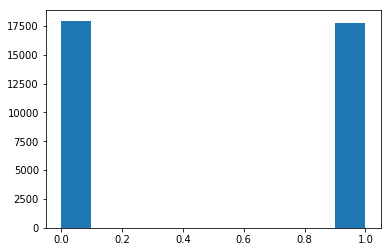

In [5]:
plt.hist(df['Positivity'])

# Bags-of-words

The simplest and most intuitive way to do so is the “bags-of-words” representation which ignores structure and simply counts how often each word occurs. CountVectorizer allows us to use the bags-of-words approach, by converting a collection of text documents into a matrix of token counts.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Positivity'], random_state = 0)
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

('X_train first entry: \n\n', 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".')
('\n\nX_train shape: ', (26813L,))


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer().fit(X_train)
from sklearn.feature_extraction.text import TfidfVectorizer
#vect = CountVectorizer(min_df = 5, stop_words='english', ngram_range = (1,2)).fit(X_train)
vect = TfidfVectorizer(min_df = 5, stop_words='english', ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

('AUC: ', 0.8973401714564959)


In [10]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
[u'disappointed' u'worst' u'thought' u'terrible' u'horrible'
 u'disappointing' u'bad' u'money' u'unfortunately' u'awful']

Largest Coef: 
[u'great' u'best' u'delicious' u'perfect' u'loves' u'love' u'excellent'
 u'good' u'wonderful' u'nice']



In [11]:
sample = ["I really amazed by the quality of your product!"]
predictions = model.predict(vect.transform(sample))
predictions[0]

1